# Code visual

## Review

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
image_original = cv2.imread("D:\TDTU_Work\DIP\Final\data\m1.jpg")
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_RGB2BGR)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Snape\AppData\Local\Temp\ipykernel_9424\675760485.py:1: SyntaxWarning: invalid escape sequence '\T'
  image_original = cv2.imread("D:\TDTU_Work\DIP\Final\data\m1.jpg")


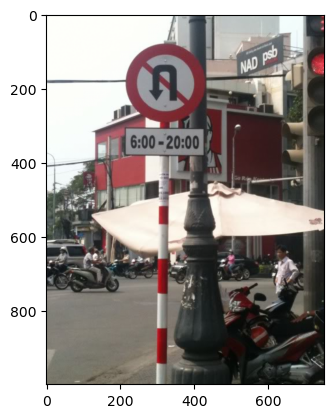

In [9]:
plt.imshow(img_rgb)

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Snape\AppData\Local\Temp\ipykernel_9024\3231795020.py:5: SyntaxWarning: invalid escape sequence '\T'
  image = cv2.imread("D:\TDTU_Work\DIP\Final\data\m1.jpg")


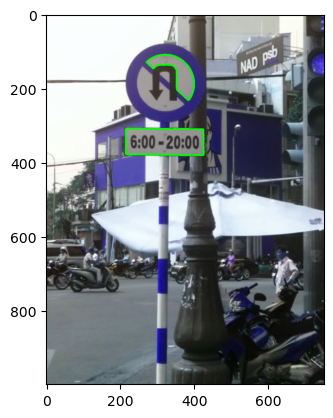

In [3]:
import cv2
import numpy as np

# Đọc ảnh từ file
image = cv2.imread("D:\TDTU_Work\DIP\Final\data\m1.jpg")

# Chuyển đổi ảnh sang thang độ xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh để giảm nhiễu
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Sử dụng phương pháp Canny để phát hiện cạnh
edges = cv2.Canny(blurred, 50, 150)

# Tìm các đường viền trong ảnh
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lọc các đường viền có diện tích lớn hơn một ngưỡng nhất định (ví dụ: 5000)
min_contour_area = 5000
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Vẽ các đường viền được phát hiện trên ảnh gốc
cv2.drawContours(image, large_contours, -1, (0, 255, 0), 3)

plt.imshow(image)

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Snape\AppData\Local\Temp\ipykernel_9024\588499641.py:6: SyntaxWarning: invalid escape sequence '\T'
  image_path = "D:\TDTU_Work\DIP\Final\data\m1.jpg"


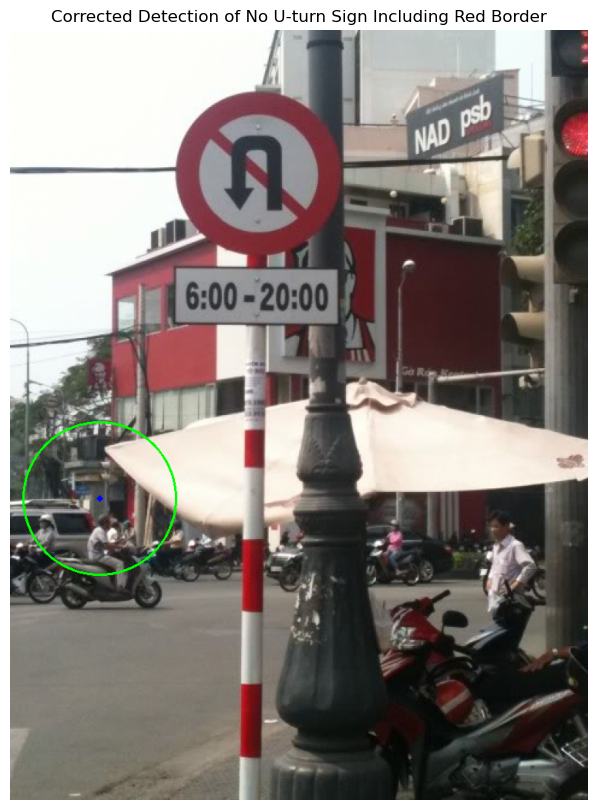

In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "D:\TDTU_Work\DIP\Final\data\m1.jpg"
image_original = cv2.imread(image_path)

# Convert to RGB (from BGR, which OpenCV uses by default)
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detector to detect edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find circles in the image using HoughCircles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=50, param2=30, minRadius=50, maxRadius=100)

# Draw the correct circle if found
if circles is not None:
    circles = np.uint16(np.around(circles))
    # Find the circle with the largest radius, assuming it is the no U-turn sign including the red border
    largest_circle = max(circles[0, :], key=lambda c: c[2])
    center = (largest_circle[0], largest_circle[1])
    radius = largest_circle[2]

    # Draw the outer circle (including the red border of the sign)
    cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)
    # Draw the center of the circle
    cv2.circle(img_rgb, center, 2, (0, 0, 255), 3)

# Display the corrected image with the right circle detected
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Corrected Detection of No U-turn Sign Including Red Border")
plt.axis("off")
plt.show()


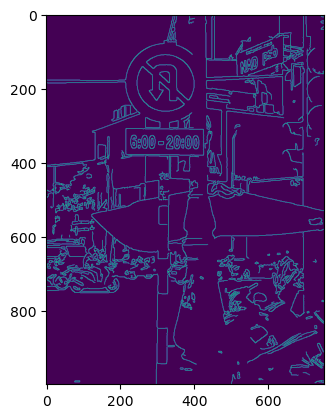

In [124]:
plt.imshow(edges)

In [90]:
# circles

In [91]:
# plt.imshow(gray, cmap= "grey")

In [116]:
# plt.imshow(blurred, cmap= "grey")

## Xác đinh viền đỏ 

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m1.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Tìm các đường viền trong ảnh
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tìm đường viền có chu vi lớn nhất
max_contour = max(contours, key=cv2.contourArea)

# Vẽ đường viền có chu vi lớn nhất trên ảnh gốc
cv2.drawContours(image_original, [max_contour], -1, (0, 255, 0), 3)

# Chuyển đổi lại ảnh từ BGR sang RGB để hiển thị với matplotlib
output_image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)




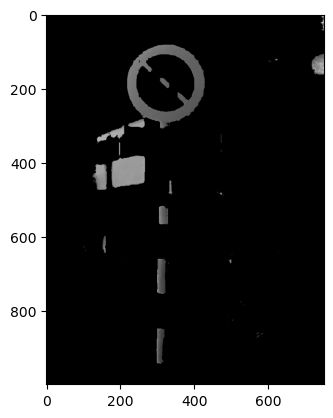

In [9]:
plt.imshow(gray, cmap= "grey")

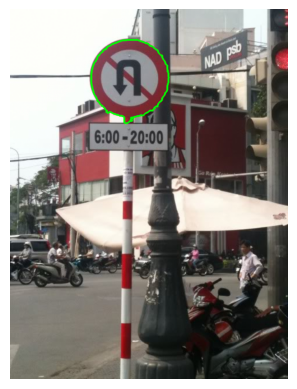

In [6]:
# Hiển thị hình ảnh kết quả
plt.imshow(output_image_rgb)
plt.axis('off')
plt.show()

# Preprocessing
- I have to fix each image
  - m1 to m11 

### Cách khác:

## m1 v1


In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m1.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 5)

# Find circles in the image using HoughCircles
rows = gray.shape[0]        # minDist
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist= rows/8,
                           param1=50, param2=40, minRadius=20, maxRadius=200)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)

In [134]:
circles

array([[[322, 187, 105]]], dtype=uint16)

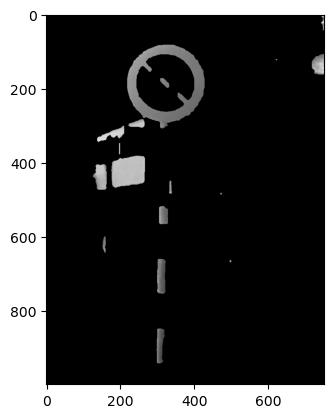

In [117]:
plt.imshow(gray, cmap= "grey")

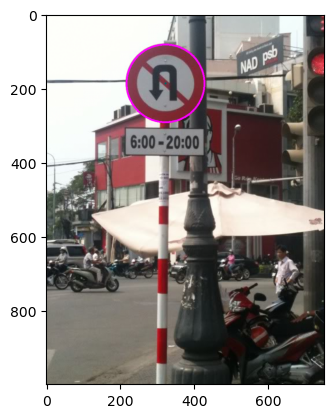

In [114]:
plt.imshow(img_rgb)

## Fix v2

### M1 v2

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m1.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.2, 60, param1=100,
                            param2= 0.85, minRadius=70)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)


In [59]:
circles

array([[[321.6    , 188.4    , 104.82387],
        [321.6    , 188.4    ,  78.29157]]], dtype=float32)

In [60]:
filtered_circles

array([[322, 188, 105]], dtype=uint16)

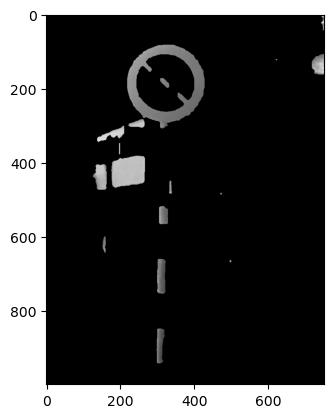

In [62]:
plt.imshow(gray, cmap= "grey")

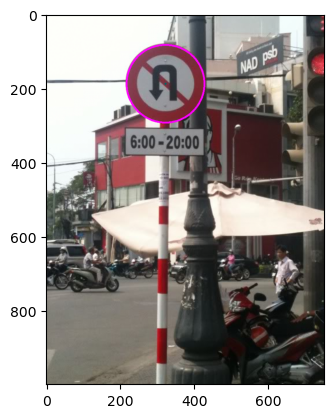

In [63]:
plt.imshow(img_rgb)

### Fix m5 v2

In [262]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m5.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 5)
rows = gray.shape[0]        # minDist
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist= rows/8,
                            param1=50, param2=40, minRadius=100, maxRadius=200)

# print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)


In [232]:
circles

array([[[1845,  692,  181]]], dtype=uint16)

In [235]:
# image_original.shape

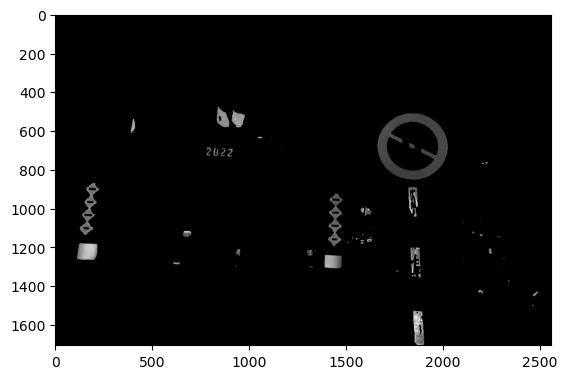

In [233]:
plt.imshow(gray, cmap= "grey")

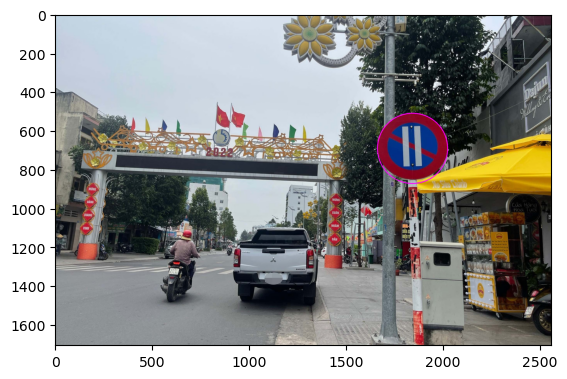

In [234]:
plt.imshow(img_rgb)

### m8 v2

In [53]:
def are_centers_close(center1, center2, threshold=10):
    distance = np.sqrt((center1[0] - center2[0]) ** 2 + (center1[1] - center2[1]) ** 2)
    return distance < threshold

# Xóa các vòng tròn có bán kính nhỏ hơn nếu có cùng tọa độ tâm x, y
def remove_smaller_circles(circles):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        unique_circles = []

        for i in range(len(circles[0, :])):
            current_circle = circles[0, i]
            add_circle = True

            for unique_circle in unique_circles:
                if are_centers_close(current_circle[:2], unique_circle[:2]):
                    if current_circle[2] > unique_circle[2]:
                        unique_circles.remove(unique_circle)
                        unique_circles.append(current_circle)
                    add_circle = False
                    break

            if add_circle:
                unique_circles.append(current_circle)

        return np.array(unique_circles)

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m8.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            2, 30, param1 = 200,
                            param2= 0.85, minRadius=30)
# print(circles)
# Điều kiện để kiểm tra hai tâm vòng tròn có gần nhau hay không


# Áp dụng hàm loại bỏ vòng tròn nhỏ hơn
filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)


In [56]:
circles

array([[[510.      , 128.      , 128.02441 ],
        [510.      , 128.      ,  95.432755]]], dtype=float32)

In [57]:
filtered_circles

array([[510, 128, 128]], dtype=uint16)

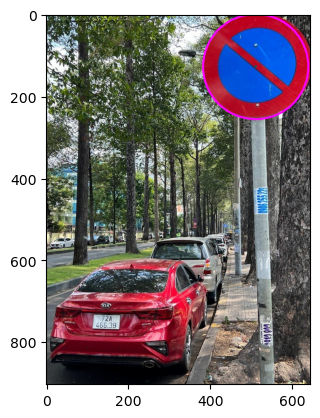

In [55]:
plt.imshow(img_rgb)

### m10 v2

In [310]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m10.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 5)

rows = gray.shape[0]        # minDist
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.5, minDist= rows/8,
                    param1=50, param2=60, minRadius=100, maxRadius=330)
# print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)


In [311]:
circles


array([[[985, 689, 321]]], dtype=uint16)

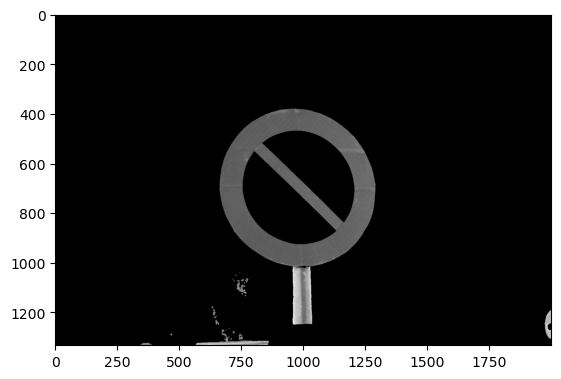

In [280]:
plt.imshow(gray, cmap= "grey")

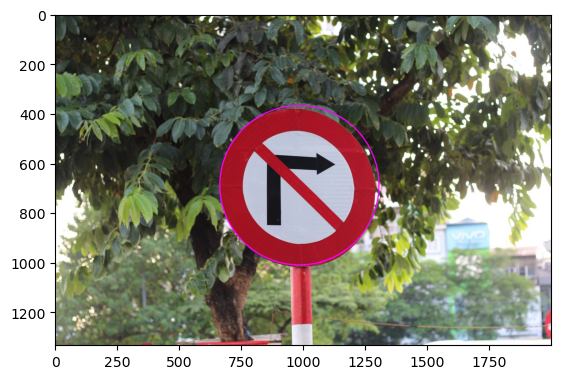

In [312]:
plt.imshow(img_rgb)

## m6 v2

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m6.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.2, 60, param1=100,
                            param2= 0.85, minRadius=10)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)


In [86]:
circles

array([[[614.4    ,  90.     ,  83.51099],
        [614.4    ,  90.     ,  63.19831]]], dtype=float32)

In [87]:
filtered_circles

array([[614,  90,  84]], dtype=uint16)

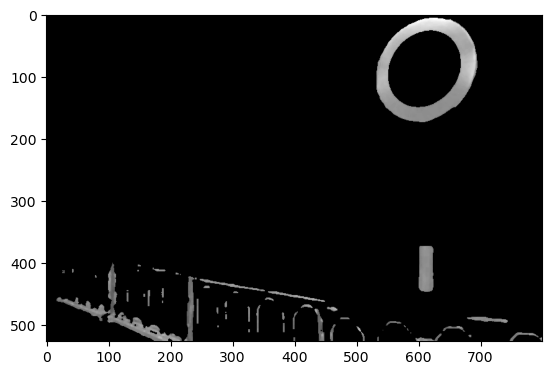

In [81]:
plt.imshow(gray, cmap= "grey")

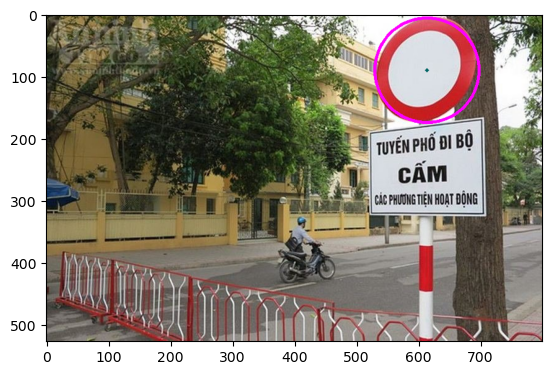

In [77]:
plt.imshow(img_rgb)

## Function test

In [317]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reviewSign(image_original):
    # Chuyển đổi ảnh từ BGR sang RGB
    img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    # Chuyển đổi ảnh từ RGB sang HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Định nghĩa phạm vi màu đỏ trong không gian màu HSV
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Tạo mặt nạ cho các vùng màu đỏ
    mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    # Lọc ra các vùng màu đỏ từ ảnh gốc
    red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

    # Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
    red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

    # Chuyển đổi ảnh thành thang độ xám để tìm đường viền
    gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

    # Reduce the noise to avoid false circle detection
    gray = cv2.medianBlur(gray, 5)

    # Find circles in the image using HoughCircles
    # rows = gray.shape[0]        # minDist
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            2, 30, param1=300,
                            param2=0.85, minRadius=10)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)
        
    return img_rgb

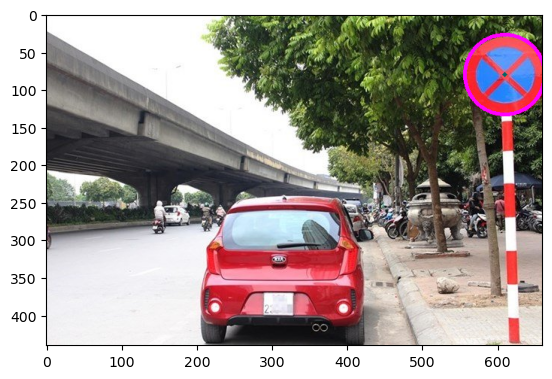

In [155]:
# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m3.jpg"
image_original = cv2.imread(image_path)

img_rgb= reviewSign(image_original)
plt.imshow(img_rgb)

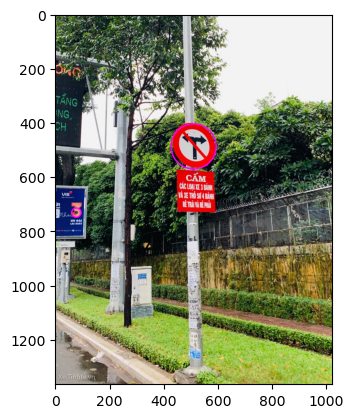

In [156]:
# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m7.jpg"
image_original = cv2.imread(image_path)

img_rgb= reviewSign(image_original)
plt.imshow(img_rgb)

## Test bien2

### m11

In [382]:
# V2
def are_centers_close(center1, center2, threshold=5):
    return np.linalg.norm(np.array(center1) - np.array(center2)) < threshold

def remove_smaller_circles(circles, min_radius=20):
    if circles is None:
        return []

    circles = np.uint16(np.around(circles))
    unique_circles = []

    for current_circle in circles[0, :]:
        add_circle = True
        for unique_circle in unique_circles:
            if are_centers_close(current_circle[:2], unique_circle[:2]):
                if current_circle[2] > unique_circle[2]:
                    # Replace the smaller circle with the larger one
                    unique_circle[:] = current_circle
                add_circle = False
                break
        if add_circle and current_circle[2] >= min_radius:
            unique_circles.append(current_circle)

    return unique_circles

In [479]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/bien2/m16.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# kernel = np.ones((3, 3))
# image_eroded = cv2.erode(gray, kernel, iterations=2)
# Reduce the noise to avoid false circle detection
# gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.2, 10, param1=100,
                            param2= 0.2, minRadius=20)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 255, 0), 2)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)


In [474]:
filtered_circles

[array([229,  55,  24], dtype=uint16), array([176,  53,  24], dtype=uint16)]

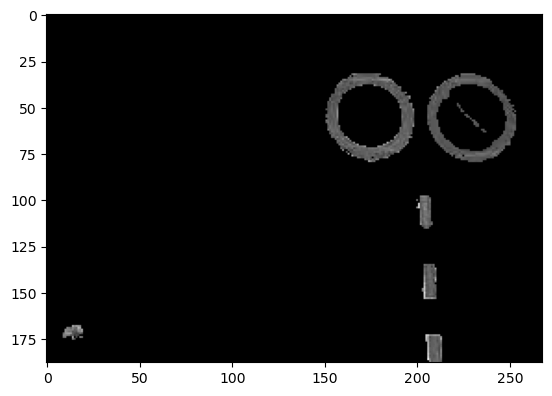

In [481]:
plt.imshow(gray, cmap= "grey")

In [464]:
filtered_circles

[array([177,  52,  24], dtype=uint16), array([230,  56,  24], dtype=uint16)]

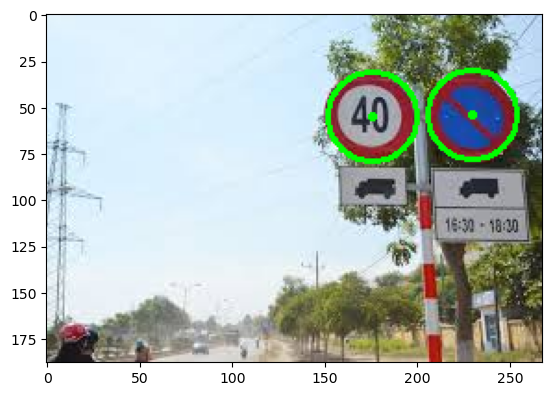

In [482]:
plt.imshow(img_rgb)

### m12

In [379]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/bien2/m12.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
# gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.2, minRadius=10)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 2)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)


In [220]:
# len(circles[0])


In [221]:
# filtered_circles

In [219]:
# plt.imshow(gray, cmap= "grey")

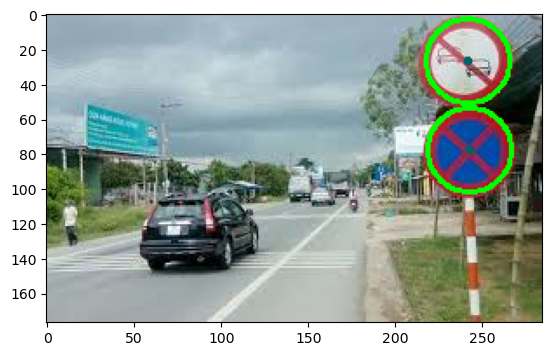

In [380]:
plt.imshow(img_rgb)

### m13

In [503]:

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/bien2/m13.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
# gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.7, minRadius=50)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 2)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)

In [504]:
filtered_circles

[array([387, 106,  66], dtype=uint16), array([519, 104,  68], dtype=uint16)]

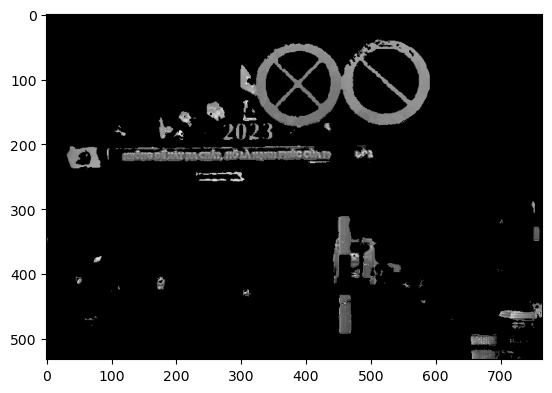

In [493]:
plt.imshow(gray, cmap= "grey")

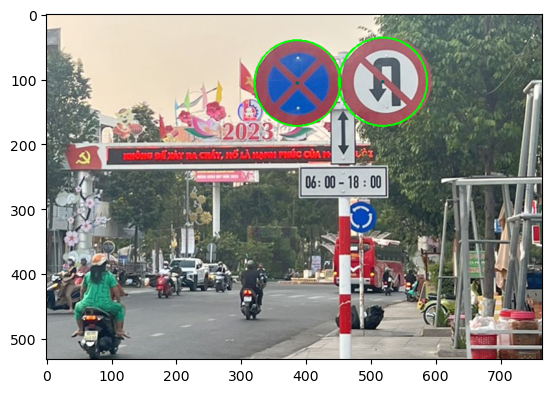

In [505]:
plt.imshow(img_rgb)

### m14

In [704]:
# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m5.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

In [707]:
img_rgb.shape

(1706, 2560, 3)

In [676]:

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/bien2/m14.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
gray = cv2.medianBlur(gray, 3)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.5, minRadius=22)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 2)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)

In [677]:
filtered_circles

[array([219,  54,  28], dtype=uint16), array([132,  33,  27], dtype=uint16)]

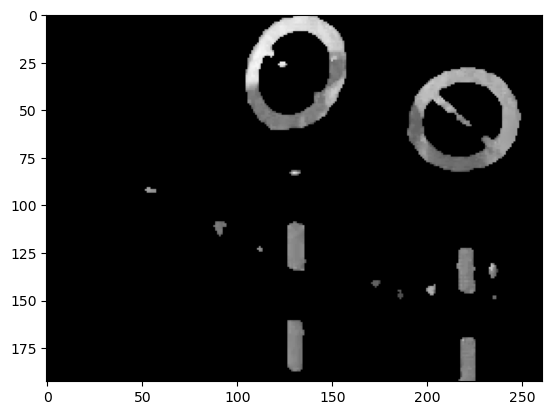

In [678]:
plt.imshow(gray, cmap= "grey")

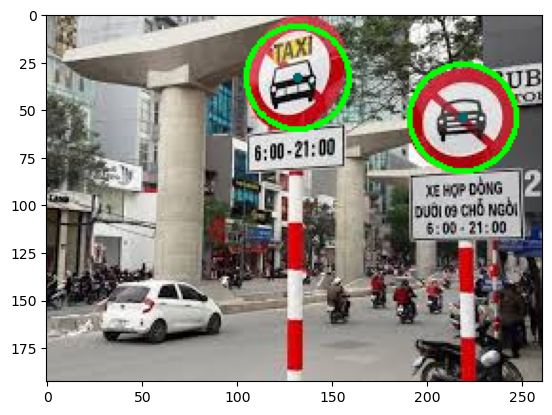

In [679]:
plt.imshow(img_rgb)

### m15

In [696]:

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/bien2/m15.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
# gray = cv2.medianBlur(gray, 3)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.4, minRadius=22)

filtered_circles = remove_smaller_circles(circles)

# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        center = (i[0], i[1])
        # Tâm của vòng tròn
        cv2.circle(img_rgb, center, 1, (0, 100, 100), 2)
        # Đường viền của vòng tròn
        radius = i[2]
        cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)

In [697]:
filtered_circles

[array([492,  87,  86], dtype=uint16), array([393, 165,  23], dtype=uint16)]

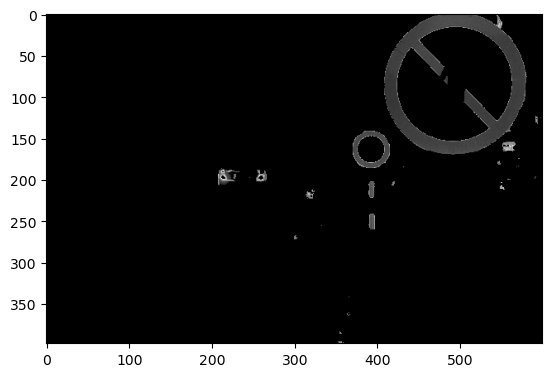

In [698]:
plt.imshow(gray, cmap= "grey")

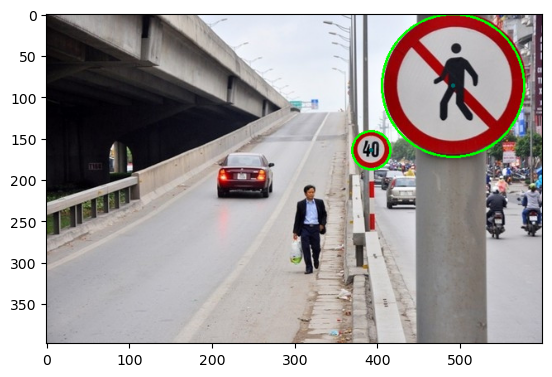

In [699]:
plt.imshow(img_rgb)

# Function to read and preprocessing image. 

### Test v1

In [321]:
# Version 2
import cv2
import numpy as np
import os

def reviewSign(image_original):
    # Chuyển đổi ảnh từ BGR sang RGB
    img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    # Chuyển đổi ảnh từ RGB sang HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Định nghĩa phạm vi màu đỏ trong không gian màu HSV
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Tạo mặt nạ cho các vùng màu đỏ
    mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    # Lọc ra các vùng màu đỏ từ ảnh gốc
    red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

    # Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
    red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

    # Chuyển đổi ảnh thành thang độ xám để tìm đường viền
    gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

    # Reduce the noise to avoid false circle detection
    gray = cv2.medianBlur(gray, 5)

    # Find circles in the image using HoughCircles
    rows = gray.shape[0]        # minDist
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            2, 30, param1=300,
                            param2=0.85, minRadius=10)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # Circle center
            cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
            # Circle outline
            radius = i[2]
            cv2.circle(img_rgb, center, radius, (255, 0, 255), 3)
        
    return img_rgb

def process_images(input_folder, output_folder):
    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats if needed
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)
            if image is not None:
                processed_image = reviewSign(image)
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, processed_image)
                print(f"Processed and saved {filename}")

# Define paths
input_folder = r"D:\TDTU_Work\DIP\Final\data"
output_folder = r"D:\TDTU_Work\DIP\Final\testImages"

# Process images
process_images(input_folder, output_folder)

Processed and saved m1.jpg
Processed and saved m10.jpg
Processed and saved m11.jpg
Processed and saved m2.jpg
Processed and saved m3.jpg
Processed and saved m4.jpg
Processed and saved m5.jpg
Processed and saved m6.jpg
Processed and saved m7.jpg
Processed and saved m8.jpg
Processed and saved m9.jpg


## Test v2

In [712]:
# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/m5.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

In [714]:
x, y, _ = img_rgb.shape
x, y

(1706, 2560)

In [381]:
# Điều kiện để kiểm tra hai tâm vòng tròn có gần nhau hay không
# before threshold=10 -> 30
# V1
def are_centers_close(center1, center2, threshold=10):
    distance = np.sqrt((center1[0] - center2[0]) ** 2 + (center1[1] - center2[1]) ** 2)
    return distance < threshold

# Xóa các vòng tròn có bán kính nhỏ hơn nếu có cùng tọa độ tâm x, y
def remove_smaller_circles(circles):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        unique_circles = []

        for i in range(len(circles[0, :])):
            current_circle = circles[0, i]
            add_circle = True

            for unique_circle in unique_circles:
                if are_centers_close(current_circle[:2], unique_circle[:2]):
                    if current_circle[2] > unique_circle[2]:
                        unique_circles.remove(unique_circle)
                        unique_circles.append(current_circle)
                    add_circle = False
                    break

            if add_circle:
                unique_circles.append(current_circle)

        return np.array(unique_circles)

In [723]:
import cv2
import numpy as np
import os

def reviewSign(image_original, filename):
    # Chuyển đổi ảnh từ BGR sang RGB
    img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
    x, y, _ = img_rgb.shape
    # Chuyển đổi ảnh từ RGB sang HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Định nghĩa phạm vi màu đỏ trong không gian màu HSV
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Tạo mặt nạ cho các vùng màu đỏ
    mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    # Lọc ra các vùng màu đỏ từ ảnh gốc
    red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

    # Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
    red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

    # Chuyển đổi ảnh thành thang độ xám để tìm đường viền
    gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

    # Giảm nhiễu để tránh phát hiện nhầm các hình tròn
    gray = cv2.medianBlur(gray, 5)

    # Tìm kiếm các hình tròn trong ảnh sử dụng HoughCircles
    if (x,y) == (1706, 2560): #m5 
        rows = gray.shape[0]  # minDist
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=rows/8,
                                   param1=50, param2=40, minRadius=100, maxRadius=200)
    elif (x,y) == (526, 800): #m6
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.2, 60, param1=100,
                            param2= 0.85, minRadius=10)    
    
    elif (x,y) == (903, 645): # m8
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                                   2, 30, param1=200,
                                   param2=0.85, minRadius=30)
    elif (x,y) == (1333, 2000): # m10
        rows = gray.shape[0]  # minDist
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.5, minDist=rows/8,
                                   param1=50, param2=60, minRadius=100, maxRadius=330)
    else:
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                                   2, 30, param1=200,
                                   param2=0.85, minRadius=10)
        
    filtered_circles = remove_smaller_circles(circles)
    
    # Vẽ các vòng tròn đã lọc
    if filtered_circles is not None:
        for i in filtered_circles:
            center = (i[0], i[1])
            # Tâm của vòng tròn
            cv2.circle(img_rgb, center, 1, (0, 100, 100), 3)
            # Đường viền của vòng tròn
            radius = i[2]
            cv2.circle(img_rgb, center, radius, (0, 255, 0), 3)

    # plt - RGB , cv2 - BGR
    return cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)


def process_images(input_folder, output_folder, check):
    # Ensure output folder exists
    ver2_folder = os.path.join(output_folder, check)
    if not os.path.exists(ver2_folder):
        os.makedirs(ver2_folder)

    # List all images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats if needed
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)
            if image is not None:
                processed_image = reviewSign(image, filename)
                output_path = os.path.join(ver2_folder, filename)
                cv2.imwrite(output_path, processed_image)
                print(f"Processed and saved {filename} to {ver2_folder}")

# Define paths
input_folder = r"D:\TDTU_Work\DIP\Final\data"
output_folder = r"D:\TDTU_Work\DIP\Final\testImages"
check = "ver2"
# Process images
process_images(input_folder, output_folder, check)


Processed and saved m10.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m12.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m16.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m17.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m2.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m3.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m5.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m6.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m8.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2
Processed and saved m9.jpg to D:\TDTU_Work\DIP\Final\testImages\ver2


## Test - 2 biển

### v1

In [719]:
# # Define paths
# input_folder = r"D:\TDTU_Work\DIP\Final\data\bien2"
# output_folder = r"D:\TDTU_Work\DIP\Final\testImages"
# check = "ver3"
# # Process images
# process_images(input_folder, output_folder, check)

In [721]:
# V2
def are_centers_close(center1, center2, threshold=5):
    return np.linalg.norm(np.array(center1) - np.array(center2)) < threshold

def remove_smaller_circles(circles, min_radius=20):
    if circles is None:
        return []

    circles = np.uint16(np.around(circles))
    unique_circles = []

    for current_circle in circles[0, :]:
        add_circle = True
        for unique_circle in unique_circles:
            if are_centers_close(current_circle[:2], unique_circle[:2]):
                if current_circle[2] > unique_circle[2]:
                    # Replace the smaller circle with the larger one
                    unique_circle[:] = current_circle
                add_circle = False
                break
        if add_circle and current_circle[2] >= min_radius:
            unique_circles.append(current_circle)

    return unique_circles

In [722]:
import cv2
import numpy as np
import os

def reviewSign2(image_original, filename):
    # Chuyển đổi ảnh từ BGR sang RGB
    img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
    x, y, _ = img_rgb.shape
    # Chuyển đổi ảnh từ RGB sang HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Định nghĩa phạm vi màu đỏ trong không gian màu HSV
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Tạo mặt nạ cho các vùng màu đỏ
    mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    # Lọc ra các vùng màu đỏ từ ảnh gốc
    red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

    # Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
    red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

    # Chuyển đổi ảnh thành thang độ xám để tìm đường viền
    gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

    # Giảm nhiễu để tránh phát hiện nhầm các hình tròn
    # Tìm kiếm các hình tròn trong ảnh sử dụng HoughCircles
    if (x,y) == (188, 268): #m5 
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.2, 10, param1=100,
                            param2= 0.2, minRadius=20)
    elif (x,y) == (177, 285): #m6
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.2, minRadius=10)  
    
    elif (x,y) == (532, 765): # m8
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.7, minRadius=50)
    elif (x,y) == (193, 261): # m10
        gray = cv2.medianBlur(gray, 3)

        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.5, minRadius=22)
        
    elif (x,y) == (398, 600): # m10
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT,
                            1.5, 10, param1=150,
                            param2= 0.4, minRadius=22)
    
    filtered_circles = remove_smaller_circles(circles)
    
    # Vẽ các vòng tròn đã lọc
    if filtered_circles is not None:
        for i in filtered_circles:
            center = (i[0], i[1])
            # Tâm của vòng tròn
            cv2.circle(img_rgb, center, 1, (0, 100, 100), 2)
            # Đường viền của vòng tròn
            radius = i[2]
            cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)
    # plt - RGB , cv2 - BGR
    return cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)


def process_images2(input_folder, output_folder, check):
    # Ensure output folder exists
    ver2_folder = os.path.join(output_folder, check)
    if not os.path.exists(ver2_folder):
        os.makedirs(ver2_folder)

    # List all images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats if needed
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)
            if image is not None:
                processed_image = reviewSign2(image, filename)
                output_path = os.path.join(ver2_folder, filename)
                cv2.imwrite(output_path, processed_image)
                print(f"Processed and saved {filename} to {ver2_folder}")

# Define paths
input_folder = r"D:\TDTU_Work\DIP\Final\data\bien2"
output_folder = r"D:\TDTU_Work\DIP\Final\testImages"
check = "ver4"
# Process images
process_images2(input_folder, output_folder, check)


Processed and saved m11.jpg to D:\TDTU_Work\DIP\Final\testImages\ver4
Processed and saved m12.jpg to D:\TDTU_Work\DIP\Final\testImages\ver4
Processed and saved m13.jpg to D:\TDTU_Work\DIP\Final\testImages\ver4
Processed and saved m14.jpg to D:\TDTU_Work\DIP\Final\testImages\ver4
Processed and saved m15.jpg to D:\TDTU_Work\DIP\Final\testImages\ver4


# Lấy ra ảnh của các biển. 

In [15]:
# V2
def are_centers_close(center1, center2, threshold=5):
    return np.linalg.norm(np.array(center1) - np.array(center2)) < threshold

def remove_smaller_circles(circles, min_radius=20):
    if circles is None:
        return []

    circles = np.uint16(np.around(circles))
    unique_circles = []

    for current_circle in circles[0, :]:
        add_circle = True
        for unique_circle in unique_circles:
            if are_centers_close(current_circle[:2], unique_circle[:2]):
                if current_circle[2] > unique_circle[2]:
                    # Replace the smaller circle with the larger one
                    unique_circle[:] = current_circle
                add_circle = False
                break
        if add_circle and current_circle[2] >= min_radius:
            unique_circles.append(current_circle)

    return unique_circles

def extract_face(image, center, radius):
    # Tạo mặt nạ hình tròn
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, center, radius, 255, -1)
    
    # Áp dụng mặt nạ hình tròn lên ảnh gốc
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Cắt phần ảnh chứa khuôn mặt
    x, y = center
    cropped_sign = masked_image[y-radius:y+radius, x-radius:x+radius]
    
    return cropped_sign

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ đường dẫn
image_path = "D:/TDTU_Work/DIP/Final/data/newdata/m1.jpg"
image_original = cv2.imread(image_path)

# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh từ RGB sang HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Định nghĩa phạm vi màu đỏ trong không gian màu HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Tạo mặt nạ cho các vùng màu đỏ
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Lọc ra các vùng màu đỏ từ ảnh gốc
red_regions = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Chuyển đổi ảnh RGB thành BGR để phù hợp với định dạng của OpenCV
red_regions_bgr = cv2.cvtColor(red_regions, cv2.COLOR_RGB2BGR)

# Chuyển đổi ảnh thành thang độ xám để tìm đường viền
gray = cv2.cvtColor(red_regions_bgr, cv2.COLOR_BGR2GRAY)

# Reduce the noise to avoid false circle detection
grayBlur = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(grayBlur, cv2.HOUGH_GRADIENT_ALT,
                                   2, 30, param1=200,
                                   param2=0.85, minRadius=10)

filtered_circles = remove_smaller_circles(circles)
    
# Vẽ các vòng tròn đã lọc
if filtered_circles is not None:
    for i in filtered_circles:
        # center = (i[0], i[1])
        x, y, radius = i[0], i[1], i[2]
        # Tâm của vòng tròn
        # cv2.circle(img_rgb, (x, y), 1, (0, 255, 0), 2)
        # # Đường viền của vòng tròn
        
        # cv2.circle(img_rgb, (x, y), radius, (0, 255, 0), 2)
        
        
        mask = np.ones_like(image_original) * 255

        # Vẽ hình tròn màu đen lên mặt nạ
        cv2.circle(mask, (x, y), radius, (0, 0, 0), -1)

        # Tạo ảnh nền trắng
        white_bg = np.ones_like(image_original) * 255

        # Áp dụng mặt nạ lên ảnh gốc
        roi = np.where(mask == 0, image_original, white_bg)
        
        signImage = extract_face(image_original, center, radius)

    


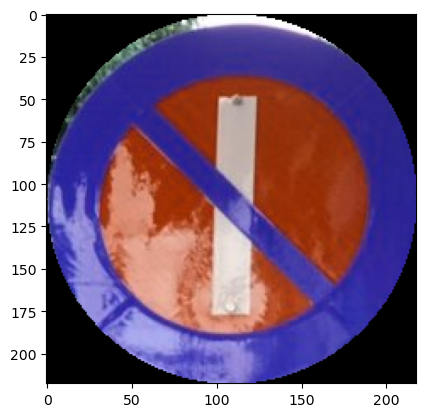

In [17]:
plt.imshow(signImage)

In [ ]:
# def extract_face(image, center, radius):
#     # Tạo mặt nạ hình tròn
#     mask = np.zeros(image.shape[:2], dtype="uint8")
#     cv2.circle(mask, center, radius, 255, -1)
    
#     # Áp dụng mặt nạ hình tròn lên ảnh gốc
#     masked_image = cv2.bitwise_and(image, image, mask=mask)
    
#     # Cắt phần ảnh chứa khuôn mặt
#     x, y = center
#     cropped_face = masked_image[y-radius:y+radius, x-radius:x+radius]
    
#     return cropped_face

# # Tọa độ tâm và bán kính của các khuôn mặt
# # faces = [((95, 145), 55), ((270, 110), 50), ((440, 170), 55)]

# # Trích xuất và hiển thị từng khuôn mặt
# for i, (center, radius) in enumerate(faces):
#     signImage = extract_face(image_original, center, radius)
    
#     # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
#     face_image_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
    
#     # Hiển thị ảnh
#     plt.figure()
#     plt.imshow(face_image_rgb)
#     plt.title(f"Extracted Face {i+1}")
#     plt.axis('off')
#     plt.show()

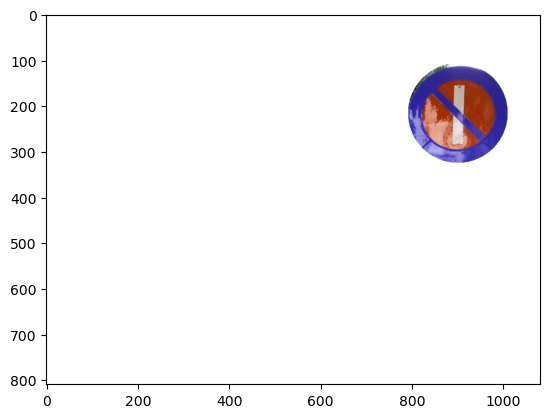

In [13]:
plt.imshow(roi)

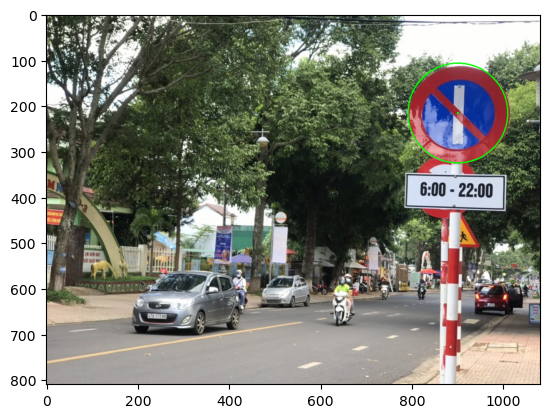

In [11]:
plt.imshow(img_rgb)